<a href="https://colab.research.google.com/github/AkshayLunawat/Internship_Project/blob/master/Intership_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Code is Developed by Akshay Lunawat

**Problem Stament**

In the earlier campaign, Out of 5000 customers only 480 customers accepted the personal loan and now the bank want to increase the ratio of their loan business to increase profits by the interests. So , the bank wants to convert the liability based customers to personal loan customers. Earlier bank has conducted a  campaign on libality based customers that showed a healthy conversion rate of over 9% success. Now, the bank want to develop a model which will find the potential cutomers who have higher possiblities of purchasing loan.

**Step 1.1 Importing the required Libraries.**

In [86]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Step 1.2 Importing Dataset**

In [87]:
#Read Dataset
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [88]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Step 1.3 Identifying Shape of Dataset**

In [89]:
#Dataset length & width
data.shape

(5000, 14)

**Step 1.4 Check Datatype**

In [90]:
#Dataset DataTypes
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Step 1.5 Statistical Summary**

In [91]:
#Summary of Dataset including mean, mode and median.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Step 1.6 Identfying Null Values**

In [92]:
#Count of Null Values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Step 1.7 Identfying Unique Values**

In [93]:
#Unique Values
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Step 2.1 Check if data need to cleaned for any of the variables**

So by analysing, we can distribute the attributes in a way such as,

*ID* - Id does not provide any information to our personal loan and also it doesn't provide anything for our future conclusion. So we can neglet this attributee. 

So by analysing *unique record* we can see that there are *5 attributes* that are in the binary form.

*Personal Loa*n - Did the customer accepted the personal loan ? This is our target variable.

*Securities Account* - Does the customer have a securities account ?

*CD Account* - Does the customer have a certificate of deposit (CD) account ?

*Online* - Does the customer use internet banking facilities ?

*Credit Card* - Does the customer use a credit card ?

And same form unique we can see,

*Family and Education* are *Ordinal Categorical* Variables.

While *Zip Code* is related to area its a *nominal* variable.

In [94]:
#Removing Id Attribute
data = data.drop(['ID'],axis=1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Step 2.2 Cleaning Negative Experience**

There are some records with negative experience. So we have to remove it first to make data consistent.

In [95]:
#Count how much negative experience are there.
data[data['Experience'] < 0]['Experience'].count()

52

In [96]:
#Taking median value of Experience column, to remove negative values
data.loc[data.Experience<0,'Experience'] = data['Experience'].median(axis = 0)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Step 3.1 Number of unique in Each column**

Already done in step 1.7

**Step 3.2 Number of people with zero mortgage**


In [97]:
#people with zero mortgage count
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

**Step 3.3 Number of people with zero credit card spending per month**

In [98]:
(data.CCAvg == 0).sum()

106

In [99]:
#else
temp = data[data['CreditCard'] == 0]
temp[temp['CCAvg'] > 0]['CCAvg'].count()

3452

**Step 3.4 Value counts of all categorical columns.**


In [100]:
data[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']].apply(pd.Series.value_counts)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,NaN,NaN,4520.0,4478.0,4698.0,2016.0,3530.0
1,1472.0,2096.0,480.0,522.0,302.0,2984.0,1470.0
2,1296.0,1403.0,NaN,NaN,NaN,NaN,NaN
3,1010.0,1501.0,NaN,NaN,NaN,NaN,NaN
4,1222.0,NaN,NaN,NaN,NaN,NaN,NaN


**Step 3.5 Univariate and Bivariate analysis**


0    4520
1     480
Name: Personal Loan, dtype: int64


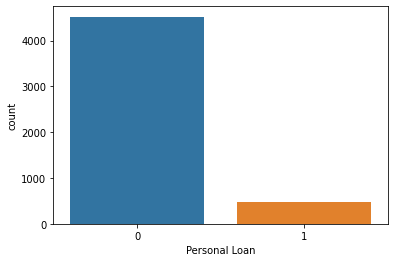

In [101]:
#Personal Loan
print(data['Personal Loan'].value_counts())
sns.countplot(x = 'Personal Loan', data = data)

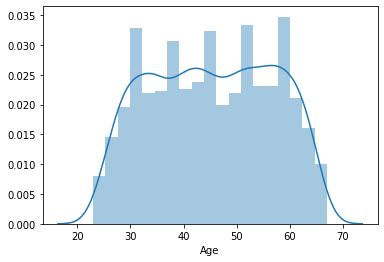

In [102]:
#Age
sns.distplot(data['Age'])

Age - Majority of customers falls under 30 and 60 years of age group. We can confirm this by looking at the plot.

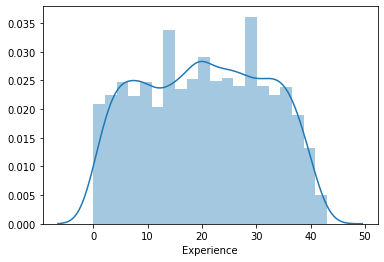

In [103]:
#Experience
sns.distplot(data['Experience'])

Experience - Experience is also normally distributed.

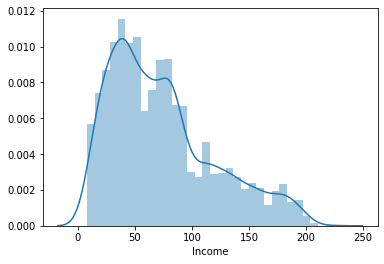

In [104]:
#Income
sns.distplot(data['Income'])

Income - Income is positively skewed.

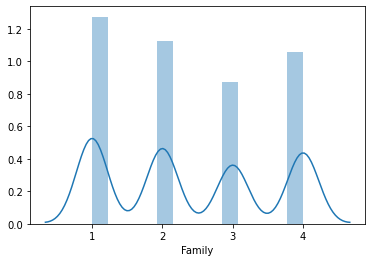

In [105]:
#Family
sns.distplot(data['Family'])

Family - The is uniformaly distrubuted. Data points are more with family size 1 and 2.

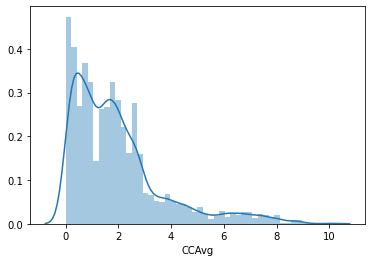

In [106]:
#CCAvg
sns.distplot(data['CCAvg'])

CCAvg - The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.

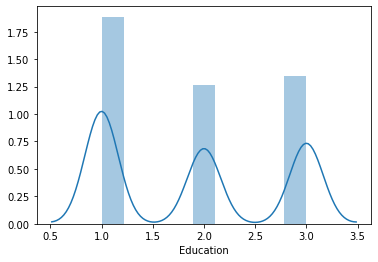

In [107]:
#Education
sns.distplot(data['Education'])

Education - Undergrad level customers are more than the Graduate and Advanced/Professional customers.

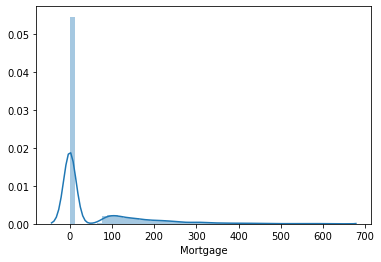

In [108]:
#Mortgage
sns.distplot(data['Mortgage'])

Mortgage - The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage.

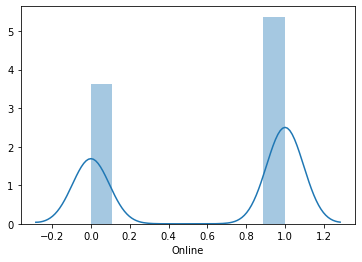

In [109]:
#Online
sns.distplot(data['Online'])

Online - This is a Bernoulli Distrubution. Number of customers who have Online accout is geater than the number of customers who do not have online account

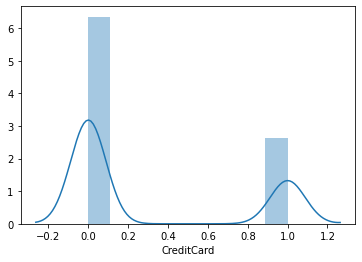

In [110]:
#Credit Card
sns.distplot(data['CreditCard'])

Credit Card -It is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

**Bivariate analysis**

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


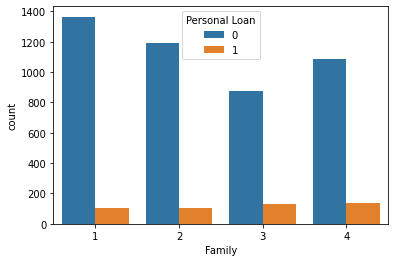

In [111]:
#Family
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'Family', aggfunc = 'size'))
sns.countplot(x = 'Family', data = data, hue = 'Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


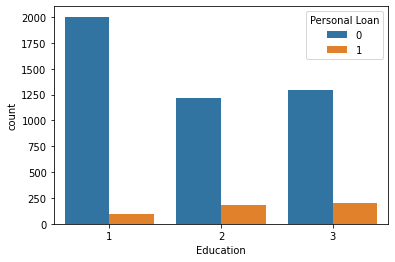

In [112]:
#Education
print(pd.pivot_table(data = data, index = 'Personal Loan',columns = 'Education', aggfunc = 'size'))
sns.countplot(x='Education', data = data, hue = 'Personal Loan')

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


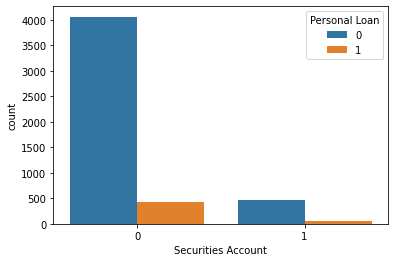

In [113]:
#Securities Account
print(pd.pivot_table(data = data, index='Personal Loan', columns='Securities Account', aggfunc='size'))
sns.countplot(x = 'Securities Account', data = data, hue = 'Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


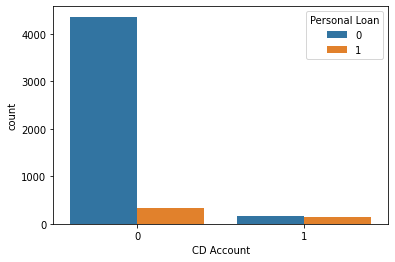

In [114]:
#CD Account
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'CD Account', aggfunc = 'size'))
sns.countplot( x = 'CD Account', data = data, hue = 'Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


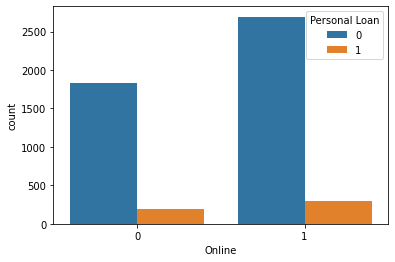

In [115]:
#Online
print(pd.pivot_table(data = data, index = 'Personal Loan', columns='Online', aggfunc='size'))
sns.countplot( x = 'Online', data = data, hue = 'Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


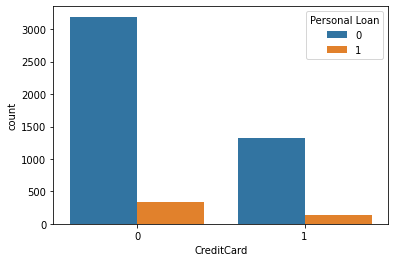

In [116]:
#CreditCard
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'CreditCard', aggfunc='size'))
sns.countplot( x = 'CreditCard', data = data, hue = 'Personal Loan')

**Step 3.6 Identify Correalted Variables**

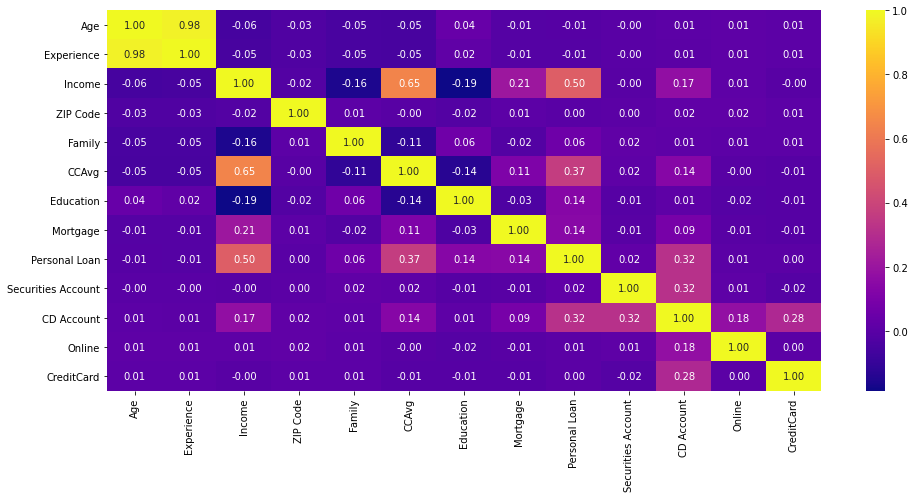

In [117]:
#Corealtion
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(),cmap='plasma',annot=True,fmt='.2f')


1. Age and Experience are highly correlated and the correlation is almost 1
2. 'Income' and 'CCAvg' is moderately correlated.
3. Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

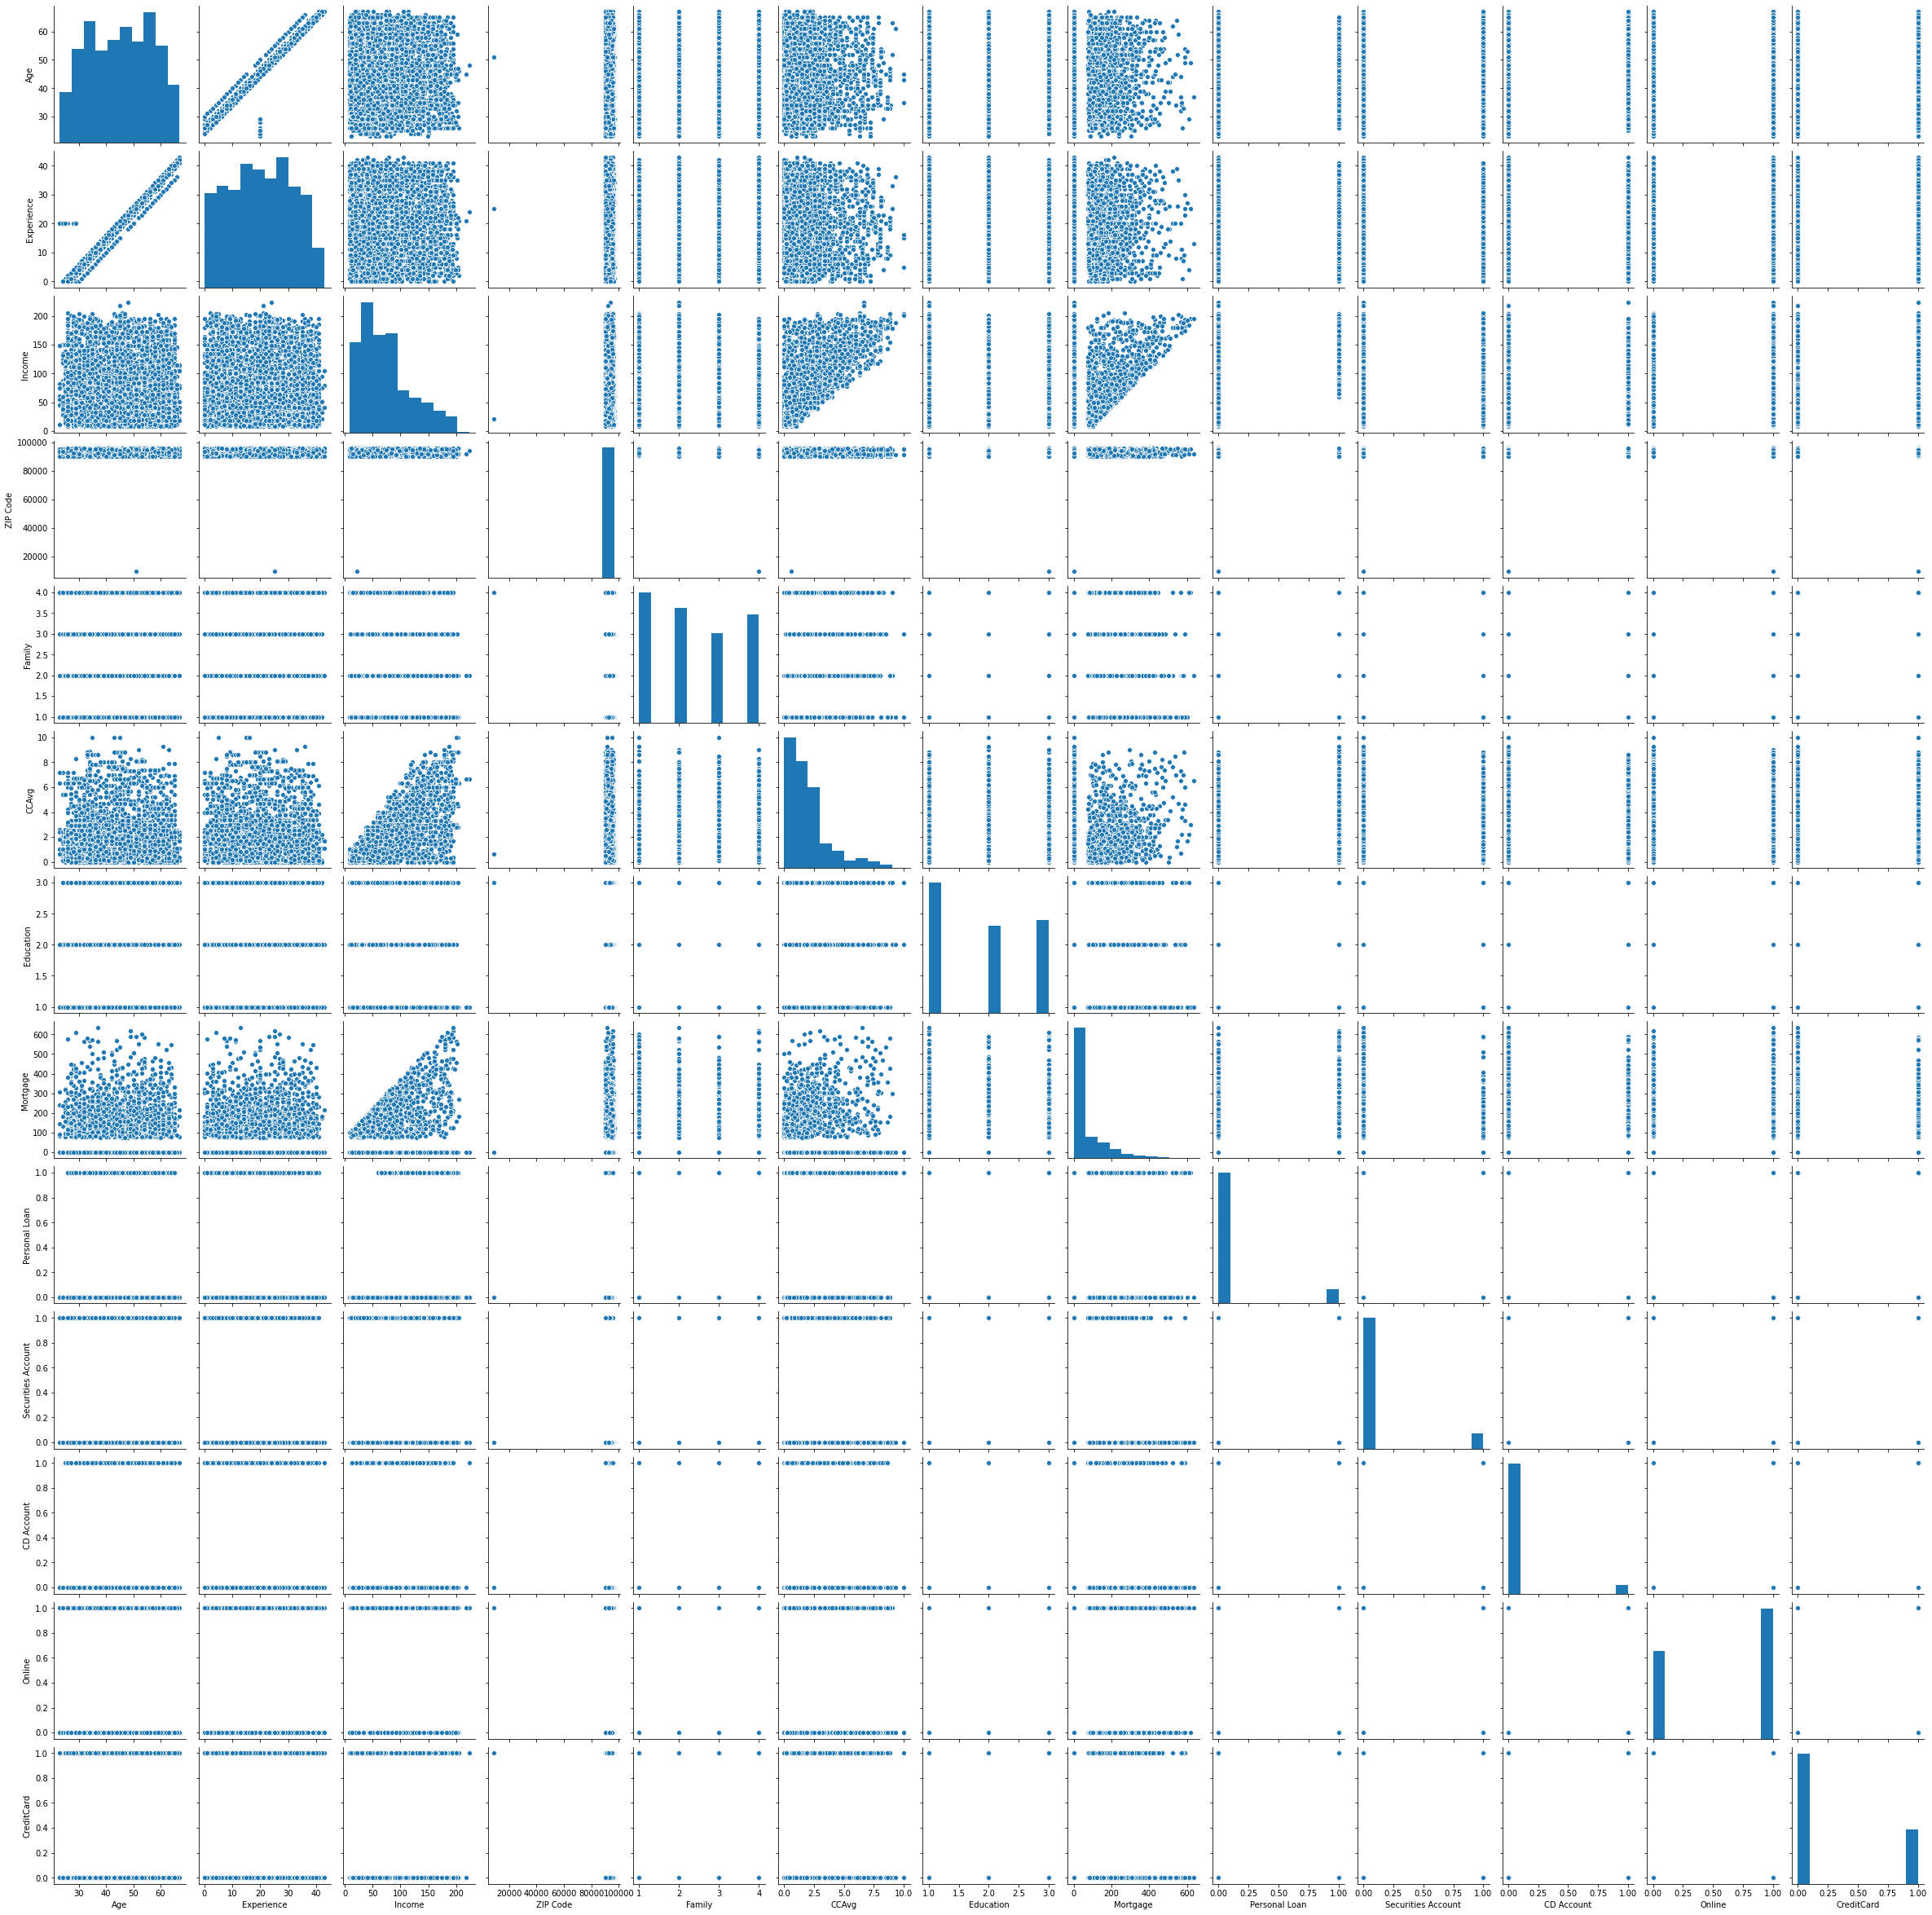

In [118]:
sns.pairplot(data)

**Step 4 Apply necessary transformations for the feature variables**

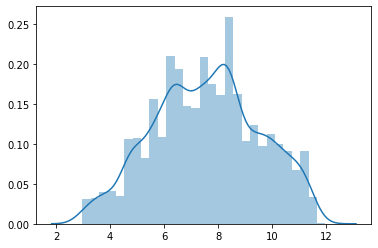

In [119]:
#skewed to Normal Distribution
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data["Income"].values.reshape(-1,1))
sns.distplot(pt.transform(data["Income"].values.reshape(-1,1)))

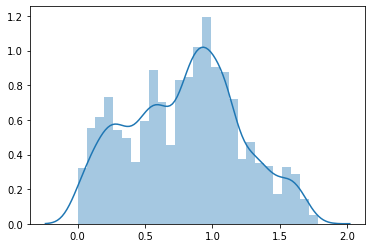

In [120]:
#skewed to Normal Distribution
pt.fit(data["CCAvg"].values.reshape(-1,1))
sns.distplot(pt.transform(data["CCAvg"].values.reshape(-1,1)))

In [121]:
data["New_Mortgage"] = pd.cut(data["Mortgage"], 
                              bins = [0, 100, 200, 300, 400, 500, 600, 700],
                              labels = [0, 1, 2, 3, 4, 5, 6],
                              include_lowest = True)
data = data.drop(['Mortgage'], axis=1)

In [122]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,New_Mortgage
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


In [123]:
#drop zipcode, doesn't found relevant
data = data.drop(['ZIP Code'], axis=1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


**Step 4.1 Seperating Target Variable from Independent Variables from Data**

In [124]:
copy_data = data
X_data = copy_data.drop('Personal Loan', axis=1).astype('int64')
Y_data = copy_data[['Personal Loan']].astype('int64')

In [125]:
#Applying Standard Transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X_data).astype('int64')
y = scaler.fit_transform(Y_data).astype('int64')

**Step 5 Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

In [126]:
#Spilting Data in 70:30 Ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify = y, random_state = 0)

In [127]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 11) (1500, 11) (3500, 1) (1500, 1)


**Step 6 Use the Logistic Regression model to predict the likelihood of a customer buying personal loans**

In [128]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
#Prediction
y_predict = logreg.predict(x_test)


**Step 7.1 Print all the metrics related for evaluating the model performance**

In [130]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict)))

Accuracy of logistic regression classifier on test set: 0.94


In [131]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1338   18]
 [  66   78]]

True Possitive    =  78
True Negative     =  1338
False Possive     =  18
False Negative    =  66


From the above confusion matrix results we see that accuracy is **94.4%**

**Step 7.2 After Scaling of Model**

In [132]:
#Scaling Model
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

scaled_logreg = LogisticRegression()
scaled_logreg.fit(x_train_scaled, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
#Prediction
y_predict_scaled = logreg.predict(x_test_scaled)

In [134]:
#Accuracy
print('Accuracy of logistic regression classifier on scaled test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_scaled)))

Accuracy of logistic regression classifier on scaled test set: 0.94


In [135]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_scaled = confusion_matrix(y_test, y_predict_scaled)
print(confusion_matrix_scaled)
print('\nTrue Possitive    = ', confusion_matrix_scaled[1][1])
print('True Negative     = ',   confusion_matrix_scaled[0][0])
print('False Possive     = ',   confusion_matrix_scaled[0][1])
print('False Negative    = ',   confusion_matrix_scaled[1][0])

[[1317   39]
 [  45   99]]

True Possitive    =  99
True Negative     =  1317
False Possive     =  39
False Negative    =  45


From the above confusion matrix results we see that accuracy is 94.4%

**Step 8 Build various other classification algorithms and compare their performance**

**Step 8.1 Applying K Nearest Neighbour**

In [136]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           3       0.81      0.54      0.65       144

    accuracy                           0.94      1500
   macro avg       0.88      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [137]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform' )
NNH.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [138]:
#prediction
predict_labels_KNN = NNH.predict(x_test)

In [139]:
#Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels_KNN)))

Accuracy of KNN classifier on test set: 0.95


In [140]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_labels_KNN)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1344   12]
 [  59   85]]

True Possitive    =  85
True Negative     =  1344
False Possive     =  12
False Negative    =  59


From the above confusion matrix results we see that accuracy is **95.26%**

**Step 8.2 After Scaling of Model**

In [141]:
NNH.fit(x_train_scaled, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [142]:
#prediction
predict_labels_KNN_scaled = NNH.predict(x_test_scaled)

In [143]:
#Accuracy
print('Accuracy of KNN classifier on Scaled test set: {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels_KNN_scaled)))

Accuracy of KNN classifier on Scaled test set: 0.95


In [144]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_scaled = confusion_matrix(y_test, predict_labels_KNN_scaled)
print(confusion_matrix_scaled)
print('\nTrue Possitive    = ', confusion_matrix_scaled[1][1])
print('True Negative     = ',   confusion_matrix_scaled[0][0])
print('False Possive     = ',   confusion_matrix_scaled[0][1])
print('False Negative    = ',   confusion_matrix_scaled[1][0])

[[1341   15]
 [  59   85]]

True Possitive    =  85
True Negative     =  1341
False Possive     =  15
False Negative    =  59


From the above confusion matrix results we see that accuracy is **95.06%**

**Step 8.3 Applying Gaussian Naive Bayes**

In [145]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [146]:
#prediction
predict_labels_GNB = GNB.predict(x_test)

In [147]:
#Accuracy
print('Accuracy of Navie Bayes classifier on test set: {:.2%}'.format(metrics.accuracy_score(y_test, predict_labels_GNB)))

Accuracy of Navie Bayes classifier on test set: 87.67%


In [148]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_labels_GNB)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1224  132]
 [  53   91]]

True Possitive    =  91
True Negative     =  1224
False Possive     =  132
False Negative    =  53


From the above confusion matrix results we see that accuracy is 87.67%

**Step 8.4 After Scaling of Model**

In [149]:
GNB.fit(x_train_scaled, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
#prediction
predict_labels_GNB_scaled = GNB.predict(x_test_scaled)

In [151]:
#Accuracy
print('Accuracy of Navie Bayes classifier on Scaled test set: {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels_GNB_scaled)))

Accuracy of Navie Bayes classifier on Scaled test set: 0.88


In [152]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_scaled = confusion_matrix(y_test, predict_labels_GNB_scaled)
print(confusion_matrix_scaled)
print('\nTrue Possitive    = ', confusion_matrix_scaled[1][1])
print('True Negative     = ',   confusion_matrix_scaled[0][0])
print('False Possive     = ',   confusion_matrix_scaled[0][1])
print('False Negative    = ',   confusion_matrix_scaled[1][0])

[[1226  130]
 [  54   90]]

True Possitive    =  90
True Negative     =  1226
False Possive     =  130
False Negative    =  54


From the above confusion matrix results we see that accuracy is 87.73%

**Step 8.5 Applying DecisionTreeClassifier**

In [153]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
#prediction
predict_labels_DTC = DTC.predict(x_test)

In [155]:
#Accuracy
print('Accuracy of Decision Tree classifier on test set: {:.2%}'.format(metrics.accuracy_score(y_test, predict_labels_DTC)))

Accuracy of Decision Tree classifier on test set: 97.53%


In [156]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_labels_DTC)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1356    0]
 [  37  107]]

True Possitive    =  107
True Negative     =  1356
False Possive     =  0
False Negative    =  37


From the above confusion matrix results we see that accuracy is **97.53%**

**Step 8.6 After Scaling of Model**

In [157]:
DTC.fit(x_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
#prediction
predict_labels_DTC_scaled = DTC.predict(x_test_scaled)

In [159]:
#Accuracy
print('Accuracy of Decision Tree classifier on Scaled test set: {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels_DTC_scaled)))

Accuracy of Decision Tree classifier on Scaled test set: 0.98


In [160]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_scaled = confusion_matrix(y_test, predict_labels_DTC_scaled)
print(confusion_matrix_scaled)
print('\nTrue Possitive    = ', confusion_matrix_scaled[1][1])
print('True Negative     = ',   confusion_matrix_scaled[0][0])
print('False Possive     = ',   confusion_matrix_scaled[0][1])
print('False Negative    = ',   confusion_matrix_scaled[1][0])

[[1356    0]
 [  37  107]]

True Possitive    =  107
True Negative     =  1356
False Possive     =  0
False Negative    =  37


From the above confusion matrix results we see that accuracy is **97.53%**

**Step 8.7 Applying Random Forest classifier**

In [161]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth = 3, random_state = 0)
RFC.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [162]:
#prediction
predict_labels_RFC = RFC.predict(x_test)

In [163]:
#Accuracy
print('Accuracy of Random Forest classifier on test set: {:.2%}'.format(metrics.accuracy_score(y_test, predict_labels_RFC)))

Accuracy of Random Forest classifier on test set: 95.33%


In [164]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_labels_RFC)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1356    0]
 [  70   74]]

True Possitive    =  74
True Negative     =  1356
False Possive     =  0
False Negative    =  70


From the above confusion matrix results we see that accuracy is **95.33%**

**Step 8.8 After Scaling of Model**

In [165]:
RFC.fit(x_train_scaled, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [166]:
#prediction
predict_labels_RFC_scaled = RFC.predict(x_test_scaled)

In [167]:
#Accuracy
print('Accuracy of Random Forest classifier on Scaled test set: {:.2f}'.format(metrics.accuracy_score(y_test, predict_labels_RFC_scaled)))

Accuracy of Random Forest classifier on Scaled test set: 0.95


In [168]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_scaled = confusion_matrix(y_test, predict_labels_RFC_scaled)
print(confusion_matrix_scaled)
print('\nTrue Possitive    = ', confusion_matrix_scaled[1][1])
print('True Negative     = ',   confusion_matrix_scaled[0][0])
print('False Possive     = ',   confusion_matrix_scaled[0][1])
print('False Negative    = ',   confusion_matrix_scaled[1][0])

[[1356    0]
 [  70   74]]

True Possitive    =  74
True Negative     =  1356
False Possive     =  0
False Negative    =  70


From the above confusion matrix results we see that accuracy is **95.33%**

**Step 9 Give a business understanding of your model**

The aim of the universal bank was to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. 

After applying Multiple models and Steps we came to conclusion,

**Logistic Regression accuracy is 94.4%**

**KNN accuracy is 95.26% (Neariest neighbour = 3)**

**Gaussian Navie Bayes accuracy is 87.73%**

**Decision Tree Classifier accuracy is 97.53% (Max depth = 3)**

**Random Forest Classifier accuracy is 95.33% (Max Depth = 3)** 

From the stats , it seems like **Decision Tree algorithm** have the highest accuracy so we can choose that as our final model.

